# Utility Functions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import metrics
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import gower
from kmodes.kprototypes import KPrototypes
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

def process_dataset(file_path):
    # Import the dataset
    df = pd.read_csv(file_path)

    # Create df_reduced dataset
    df_no_target = df.drop(['Diabetes', 'Stroke', 'Hypertension', 'Unnamed: 0'], axis=1)
    df_categorical = df.drop(['Diabetes', 'Stroke', 'Hypertension', 'Unnamed: 0', 'BMI'], axis=1)

    # Create df_encode dataset
    columns_to_encode = ['Age', 'MentHlth', 'GenHlth', 'PhysHlth']
    df_encode = pd.get_dummies(df_reduced, columns=columns_to_encode)

    return df, df_no_target, df_reduced, df_encode

def elbow_method_kmodes(data, cluster_range):
    inertias = []
    pbar = tqdm(cluster_range, desc="Progress", unit="K")
    for k in pbar:
        model = KModes(n_clusters=k)
        model.fit(data)
        inertias.append(model.cost_)
        pbar.set_postfix({'Inertia': model.cost_})
    
    # Calculate the differences between consecutive inertias
    diff_inertias = np.diff(inertias)
    
    # Calculate the second differences
    second_diffs = np.diff(diff_inertias)
    
    # Find the elbow point (K)
    elbow_index = second_diffs.argmax() + 1
    elbow_point = cluster_range[elbow_index]
    
    # Plot the graph
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, inertias, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.axvline(x=elbow_point, color='r', linestyle='--')
    plt.grid(True)
    plt.show()
    
    return elbow_point

def elbow_method_kprototypes(data, cluster_range, categorical_columns):
    inertias = []
    pbar = tqdm(cluster_range, desc="Progress", unit="K")
    for k in pbar:
        kproto_model = KPrototypes(n_clusters=k, init='Cao', random_state=42)
        clusters = kproto_model.fit_predict(data, categorical=categorical_columns)
        inertias.append(kproto_model.cost_)
        pbar.set_postfix({'Inertia': kproto_model.cost_})
    
    # Calculate the differences between consecutive inertias
    diff_inertias = np.diff(inertias)
    
    # Calculate the second differences
    second_diffs = np.diff(diff_inertias)
    
    # Find the elbow point (K)
    elbow_index = second_diffs.argmax() + 1
    elbow_point = cluster_range[elbow_index]
    
    # Plot the graph
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, inertias, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.axvline(x=elbow_point, color='r', linestyle='--')
    plt.grid(True)
    plt.show()
    
    return elbow_point


def sup_metrics(true_labels, pred_labels):
    # Supervised Evaluation Metrics
    ri = metrics.rand_score(true_labels, pred_labels)
    ari = metrics.adjusted_rand_score(true_labels, pred_labels)
    fmi = metrics.fowlkes_mallows_score(true_labels, pred_labels)
    jc = metrics.jaccard_score(true_labels, pred_labels, average='micro')
    nmi = metrics.normalized_mutual_info_score(true_labels, pred_labels)
    
    metrics_dict = {
        "Rand Index": ri,
        "Adjusted Rand Index": ari,
        "Fowlkes-Mallows Index": fmi,
        "Jaccard Coefficient": jc,
        "Normalized Mutual Information": nmi
    }
    
    return metrics_dict


def unsup_metrics(data, labels):
    # Unsupervised Evaluation Metrics
    sc = metrics.silhouette_score(data, labels)
    ch = metrics.calinski_harabasz_score(data, labels)
    db = metrics.davies_bouldin_score(data, labels)
    #dunn = metrics.dunn_score(data, labels)
    #vi = metrics.v_measure_score(true_labels, pred_labels)
    
    metrics_dict = {
        "Silhouette Coefficient": sc,
        "Calinski-Harabasz Index": ch,
        "Davies-Bouldin Index": db,
        #"Dunn Index": dunn,
        #"Variation of Information": vi
    }
    
    return metrics_dict

In [2]:
df, df_no_target, df_reduced, df_encoded = process_dataset('D:/loren/Desktop/Uni/Unsupervised/Unsupervised-main(1)/Unsupervised-main/df_adj_.csv')

# K-MODE

In [ ]:
kmodes_eval = KModes()
k_range = np.arange(1,5)
k = elbow_method_kmodes(kmodes_eval, df_encoded, k_range)

In [18]:
kmodes = KModes(n_clusters = k , init = 'random', n_init = 10, max_iter = 30, verbose = 1)
clusters_kmode = kmodes.fit(df_encoded)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/30, moves: 10363, cost: 225794.0
Run 1, iteration: 2/30, moves: 5173, cost: 220358.0
Run 1, iteration: 3/30, moves: 4362, cost: 220358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/30, moves: 9299, cost: 218426.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/30, moves: 10327, cost: 220264.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/30, moves: 10347, cost: 222170.0
Run 4, iteration: 2/30, moves: 4328, cost: 217387.0
Run 4, iteration: 3/30, moves: 1758, cost: 217387.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/30, moves: 8046, cost: 219783.0
Run 5, iteration: 2/30, moves: 2422, cost: 219783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations.

# K-PROTOTYPE

Progress: 100%|██████████| 9/9 [57:05<00:00, 380.63s/K, Inertia=1.02e+5]


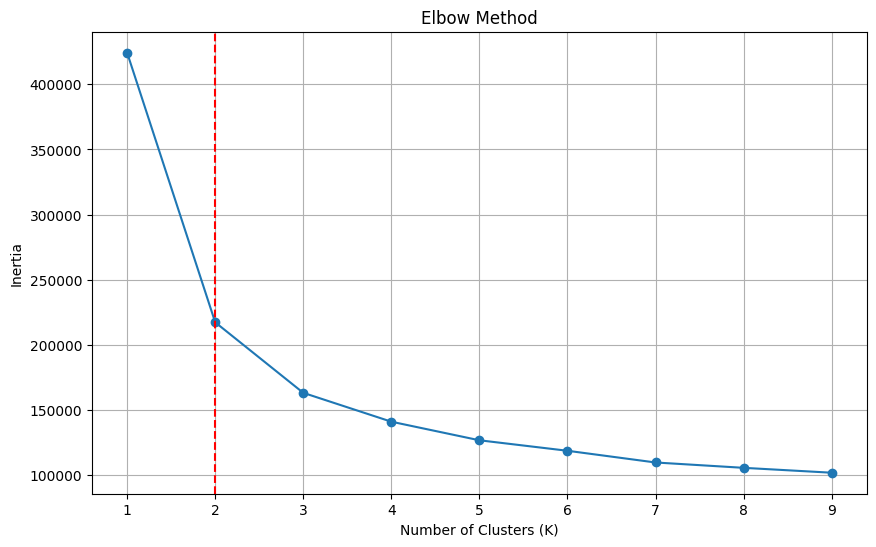

In [25]:
cat = [1,11,12,13]
k_range = np.arange(1,10)

k = elbow_method_kprototypes(df_reduced, k_range, cat)

In [26]:
kprototypes = KPrototypes(n_clusters=k, init = 'Cao',n_init = 15)
clusters_kprototypes = kprototypes.fit_predict(df_reduced, categorical = cat)

# HIERARCHICHAL

In [4]:
gower_matrix = gower.gower_matrix(df_reduced.astype('float64'))
gower_matrix_cond = squareform(gower_matrix)
Z = linkage(gower_matrix_cond, method = 'ward')

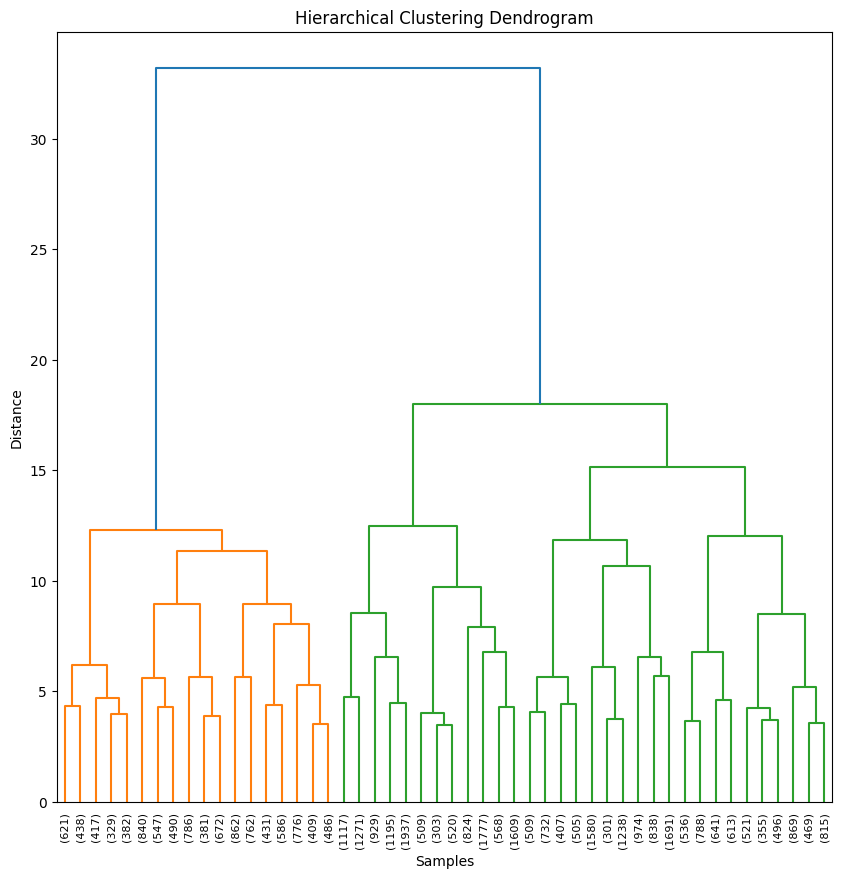

In [5]:
fig1 = plt.figure(figsize = (10,10))
dendrogram(Z, labels = df_reduced.index, orientation = 'top',p=50, truncate_mode = 'lastp') 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [7]:
max_d = 25
clusters_hierarchical = fcluster(Z, max_d, criterion = 'distance')
K = clusters_hierarchical.max()

print("We got %d cluster(s)." % K)

We got 2 cluster(s).


In [8]:
# Extract the target columns
target_columns = ["Hypertension", "Stroke", "Diabetes"]

for column in target_columns:
    
    df_clustering = df.drop(column, axis=1)
    # Evaluate the clustering using supervised evaluation metrics
    true_labels = df[column].values
    sup_eval_metrics = sup_metrics(true_labels, clusters_hierarchical)

    # Evaluate the clustering using unsupervised evaluation metrics
    unsup_eval_metrics = unsup_metrics(df_clustering.values, clusters_hierarchical)

    # Print the evaluation metrics for the current target column
    print(f"Target Column: {column}")
    print("Supervised Evaluation Metrics:")
    for metric, value in sup_eval_metrics.items():
        print(metric + ":", value)


    print()

print("\nUnsupervised Evaluation Metrics:")
for metric, value in unsup_eval_metrics.items():
    print(metric + ":", value)

Target Column: Hypertension
Supervised Evaluation Metrics:
Rand Index: 0.5129476840989724
Adjusted Rand Index: 0.022876228613796158
Fowlkes-Mallows Index: 0.5641560322879046
Jaccard Coefficient: 0.11502013740819711
Normalized Mutual Information: 0.04964757206222519

Target Column: Stroke
Supervised Evaluation Metrics:
Rand Index: 0.6158158225856784
Adjusted Rand Index: 0.08884983693242357
Fowlkes-Mallows Index: 0.7529107367845059
Jaccard Coefficient: 0.020199693820871664
Normalized Mutual Information: 0.03880586176083327

Target Column: Diabetes
Supervised Evaluation Metrics:
Rand Index: 0.5260239019473957
Adjusted Rand Index: 0.05150767899101758
Fowlkes-Mallows Index: 0.5739396903225186
Jaccard Coefficient: 0.1147065354155873
Normalized Mutual Information: 0.0658785286913928


Unsupervised Evaluation Metrics:
Silhouette Coefficient: 0.025053933778180205
Calinski-Harabasz Index: 1569.4830333673801
Davies-Bouldin Index: 3.567489329108834


In [9]:
df_clustering.values

array([[    0,     4,     1, ...,     0,     1,     0],
       [    1,     8,     0, ...,     0,     0,     0],
       [    2,     3,     0, ...,     0,     0,     0],
       ...,
       [40105,    10,     1, ...,     1,     1,     0],
       [40106,     4,     0, ...,     0,     0,     0],
       [40107,    11,     1, ...,     0,     1,     0]], dtype=int64)

In [12]:
from kmodes import kprototypes

def create_dm(dataset):
    #if the input dataset is a dataframe, we take out the values as a numpy. 
    #If the input dataset is a numpy array, we use it as is.
    if type(dataset).__name__=='DataFrame':
        dataset=dataset.values    
    lenDataset=len(dataset)
    distance_matrix=np.zeros(lenDataset*lenDataset).reshape(lenDataset,lenDataset)
    for i in range(lenDataset):
        for j in range(lenDataset):
            x1= dataset[i].reshape(1,-1)
            x2= dataset[j].reshape(1,-1)
            distance=kprototypes.matching_dissim(x1, x2)
            distance_matrix[i][j]=distance
            distance_matrix[j][i]=distance
    return distance_matrix

#data=pd.read_csv("D:/loren/Desktop/Uni/Unsupervised/Unsupervised-main(1)/Unsupervised-main/df_adj_.csv")
data = df_encoded
silhouette_scores = dict()
K = range(1,10)
distance_matrix=create_dm(data)
for k in K:
    untrained_model=KModes(n_clusters=k, n_init=4)
    trained_model=untrained_model.fit(data)
    cluster_labels = trained_model.labels_
    score=silhouette_score(distance_matrix, cluster_labels,metric="precomputed")
    silhouette_scores[k]=score
print("The k and associated Silhouette scores are: ",silhouette_scores)

In [ ]:
def mixed_distance(a,b,categorical=None, alpha=0.01):
    if categorical is None:
        num_score=kprototypes.euclidean_dissim(a,b)
        return num_score
    else:
        cat_index=categorical
        a_cat=[]
        b_cat=[]
        for index in cat_index:
            a_cat.append(a[index])
            b_cat.append(b[index])
        a_num=[]
        b_num=[]
        l=len(a)
        for index in range(l):
            if index not in cat_index:
                a_num.append(a[index])
                b_num.append(b[index])
                
        a_cat=np.array(a_cat).reshape(1,-1)
        a_num=np.array(a_num).reshape(1,-1)
        b_cat=np.array(b_cat).reshape(1,-1)
        b_num=np.array(b_num).reshape(1,-1)
        cat_score=kprototypes.matching_dissim(a_cat,b_cat)
        num_score=kprototypes.euclidean_dissim(a_num,b_num)
        return cat_score+num_score*alpha
def dm_prototypes(dataset,categorical=None,alpha=0.1):
    #if the input dataset is a dataframe, we take out the values as a numpy. 
    #If the input dataset is a numpy array, we use it as is.
    if type(dataset).__name__=='DataFrame':
        dataset=dataset.values    
    lenDataset=len(dataset)
    distance_matrix=np.zeros(lenDataset*lenDataset).reshape(lenDataset,lenDataset)
    for i in range(lenDataset):
        for j in range(lenDataset):
            x1= dataset[i]
            x2= dataset[j]
            distance=mixed_distance(x1, x2,categorical=categorical,alpha=alpha)
            distance_matrix[i][j]=distance
            distance_matrix[j][i]=distance
    return distance_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
#df=pd.read_csv("Kprototypes_dataset.csv", index_col=["Student"])
df = df_reduced
#Normalize dataset
#df["Height(in cms)"]=(df["Height(in cms)"]/df["Height(in cms)"].abs().max())*5
#df["Weight(in Kgs)"]=(df["Weight(in Kgs)"]/df["Weight(in Kgs)"].abs().max())*5
#obtain array of values
data_array=df.values
#specify data types
data_array[:, 0:3] = data_array[:, 0:3].astype(str)
data_array[:, 3:] = data_array[:, 3::].astype(float)
silhouette_scores = dict()
K = range(1,10)
distance_matrix=dm_prototypes(data_array,categorical=cat,alpha=0.1)
for k in K:
    untrained_model = kprototypes.KPrototypes(n_clusters=k,max_iter=20)
    trained_model = untrained_model.fit(data_array, categorical=cat)
    cluster_labels = trained_model.labels_
    score=silhouette_score(distance_matrix, cluster_labels,metric="precomputed")
    silhouette_scores[k]=score
print("The k and associated Silhouette scores are: ",silhouette_scores)